In [52]:
!pip install pandas pandas-ta

In [222]:
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

from utils import load_dataset

In [223]:
df = load_dataset('./NFLX.csv')

In [224]:
df

,Close,Volume,Open,High,Low
Date,,,,,
2023-08-14,427.7800,3965963,421.9900,428.8450,418.7800
2023-08-11,421.6600,3927914,428.9800,430.6317,421.3277
2023-08-10,429.9800,5467607,431.1200,438.1200,428.6900
2023-08-09,428.9000,3846639,439.7400,440.6200,427.5900
2023-08-08,438.3000,3767195,440.3600,443.5700,435.1000
...,...,...,...,...,...
2013-08-22,38.5357,9961507,38.9314,39.0657,38.3186
2013-08-21,38.6243,21240197,38.9843,39.2357,38.2143
2013-08-20,39.0414,30108269,37.5614,39.0771,37.5000


In [225]:
prices = df.loc[:, 'Close'].to_numpy()

In [226]:
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

Date
2023-08-14    0.000000
2023-08-11   -0.014306
2023-08-10    0.005143
2023-08-09    0.002618
2023-08-08    0.024592
                ...   
2013-08-22   -0.909917
2013-08-21   -0.909710
2013-08-20   -0.908735
2013-08-19   -0.913247
2013-08-16   -0.913550
Name: CUMPCTRET_1, Length: 2515, dtype: float64

In [227]:
rsi = df.ta.rsi().to_numpy()
rsi = np.where(np.isfinite(rsi), rsi, 0)
rsi = np.column_stack((rsi,))

In [228]:
ma1 = df.ta.sma(length=20).to_numpy()
ma1 = np.where(np.isfinite(ma1), ma1, 0)

ma2 = df.ta.sma(length=50).to_numpy()
ma2 = np.where(np.isfinite(ma2), ma2, 0)

ma3 = df.ta.sma(length=100).to_numpy()
ma3 = np.where(np.isfinite(ma3), ma3, 0)

In [229]:
frame_start = 1500
frame_end = 2000
prices = prices[frame_start:frame_end]
rsi = rsi[frame_start:frame_end]
ma1 = ma1[frame_start:frame_end]
ma2 = ma2[frame_start:frame_end]
ma3 = ma3[frame_start:frame_end]
prices.size

500

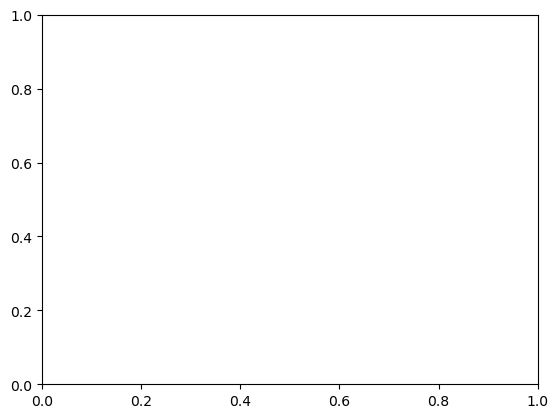

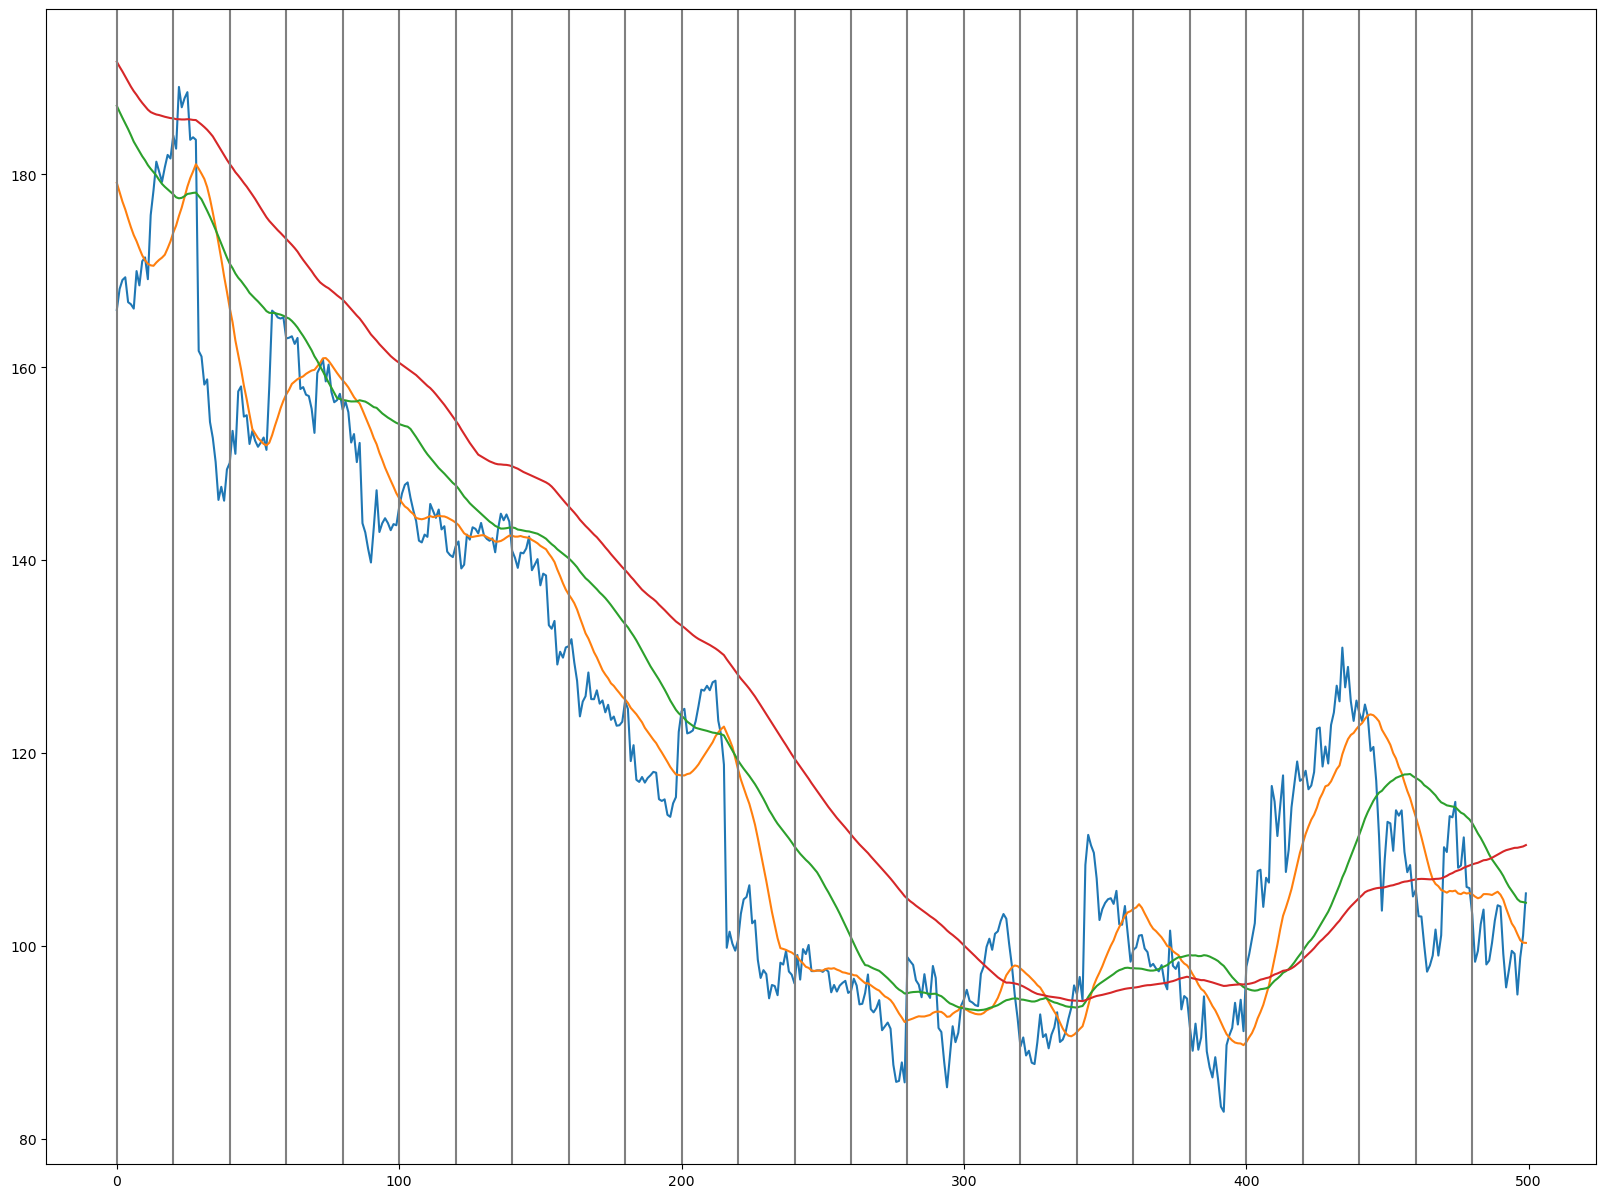

In [231]:
plt.cla()
plt.figure(figsize=(20, 15))
plt.plot(prices)
#plt.plot(rsi)
plt.plot(ma1)
plt.plot(ma2)
plt.plot(ma3)

frames = range(0, prices.size, 20)
for x in frames:
    plt.axvline(x=x, color='gray')
#plt.show()
plt.savefig('./test.png')